Check the GPU, make sure it is Tesla P100-PCIE

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Jul  3 09:48:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Set Tensorflow version

In [ ]:
%tensorflow_version 1.X
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.X`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


'/device:GPU:0'

## Copy files from gitlab

In [ ]:
!git clone https://gitlab.com/irafm-ai/poly-yolo.git

Cloning into 'poly-yolo'...
remote: Enumerating objects: 1909, done.
remote: Counting objects: 100% (1909/1909), done.
remote: Compressing objects: 100% (1511/1511), done.
remote: Total 1909 (delta 447), reused 1832 (delta 370), pack-reused 0
Receiving objects: 100% (1909/1909), 1.15 GiB | 22.37 MiB/s, done.
Resolving deltas: 100% (447/447), done.
Checking out files: 100% (1439/1439), done.


In [ ]:
%cd poly-yolo/poly_yolo
%pwd

/content/poly-yolo/poly_yolo


'/content/poly-yolo/poly_yolo'

In [ ]:
import os

target_folder = '/content/poly-yolo/simulator_dataset/imgs'
print("total images in target folder: ", len(os.listdir(target_folder)))

total images in target folder:  901


In [ ]:
%pwd

'/content/poly-yolo/poly_yolo'

move the default dataset to current directory

In [ ]:
!mv /content/poly-yolo/simulator_dataset/* .

## Set anchors and classes 
with kmeans.py generate adjusted anchors  
revise filename in line 99  


In [ ]:
!python kmeans.py

K anchors:
 [[ 1  1]
 [ 2  4]
 [ 4  9]
 [ 6  2]
 [11  6]
 [16  8]
 [17  2]
 [33 22]
 [96 63]]
Accuracy: 64.32%


Revise the yolo_anchors.txt according to the result above

In [ ]:
# Revise the yolo_anchors.txt according to the result above

Define classes in yolo_classes.py

In [ ]:
# Define classes in yolo_classes.py

## Train the model
- Edit filename in line 895, 896  
- Note that the image file path should be correct in simulator-train.txt and simulator-val.txt  
- Run poly-yolo.py and train it. Optionally set optimizer, batch size, model resolution, nr of epochs etc.

In [ ]:
!python poly_yolo.py

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-07-06 03:58:29.481336: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-06 03:58:29.483625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-06 03:58:29.484159: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2020-07-06 03:58:29.484387: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-06 03:58:29.486105: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-07-06 03:58:29.487839:

In [ ]:
# save the trained model in your folder
!cp -r models/ep016-loss9.822-val_loss7.828.h5 /content/drive/My\ Drive/Colab\ data/checkpoints/poly_yolo.h5

## Test the model

In [ ]:
import cv2
import numpy as np
import os
import time
import poly_yolo as yolo

from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
#load pretrained model
#if you want to detect more objects, lower the score and vice versa
trained_model = yolo.YOLO(model_path='models/ep016-loss9.822-val_loss7.828.h5', iou=0.5, score=0.3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
models/ep016-loss9.822-val_loss7.828.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
 #helper function
def translate_color(cls):
    if cls == 0: return (230, 25, 75)
    if cls == 1: return (60, 180, 75)
    if cls == 2: return (255, 225, 25)
    if cls == 3: return (0, 130, 200)
    if cls == 4: return (245, 130, 48)
    if cls == 5: return (145, 30, 180)
    if cls == 7: return (70, 240, 240)
    if cls == 8: return (240, 50, 230)
    if cls == 9: return (210, 245, 60)
    if cls == 10: return (250, 190, 190)
    if cls == 11: return (0, 128, 128)
    if cls == 12: return (230, 190, 255)
    if cls == 13: return (170, 110, 40)
    if cls == 14: return (255, 250, 200)
    if cls == 15: return (128, 0, 128)
    if cls == 16: return (170, 255, 195)
    if cls == 17: return (128, 128, 0)
    if cls == 18: return (255, 215, 180)
    if cls == 19: return (80, 80, 128)

Upload some test images in 'test_imgs' folder

In [ ]:
# !rm -r test_imgs
# !rm -r predict
!mkdir test_imgs
!mkdir predict

In [ ]:
dir_imgs_name = 'test_imgs/' #path_where_are_images_to_clasification
out_path       = 'predict/' #path, where the images will be saved. The path must exist
list_of_imgs = [root+"/"+name for root, dirs, files in os.walk(dir_imgs_name) for name in files]    
list_of_imgs.sort()

#browse all images
total_boxes = 0
imgs        = 0
for im in range (0, len(list_of_imgs)):
    imgs    += 1
    img     = cv2.imread(list_of_imgs[im])
    overlay = img.copy()
    boxes   = []
    scores  = []
    classes = []
    
    #realize prediciction using poly-yolo
    startx = time.time()
    box, scores, classes, polygons = trained_model.detect_image(img)
    print('Prediction speed: ', 1.0/(time.time() - startx), 'fps')
    
    
    #example, hw to reshape reshape y1,x1,y2,x2 into x1,y1,x2,y2
    for k in range (0, len(box)):
        boxes.append((box[k][1], box[k][0], box[k][3], box[k][2]))
        cv2.rectangle(img, (box[k][1],box[k][0]), (box[k][3],box[k][2]), translate_color(classes[k]), 3, 1)
    total_boxes += len(boxes)
    
    #browse all boxes
    for b in range(0, len(boxes)):
        f              = translate_color(classes[b])    
        points_to_draw = []
        offset         = len(polygons[b])//3
        
        #filter bounding polygon vertices
        for dst in range(0, len(polygons[b])//3):
            if polygons[b][dst+offset*2] > 0.3: 
                points_to_draw.append([int(polygons[b][dst]), int(polygons[b][dst+offset])])
        
        points_to_draw = np.asarray(points_to_draw)
        points_to_draw = points_to_draw.astype(np.int32)
        if points_to_draw.shape[0]>0:
            cv2.polylines(img, [points_to_draw],True,f, thickness=2)
            cv2.fillPoly(overlay, [points_to_draw], f)
        
    img = cv2.addWeighted(overlay, 0.4, img, 1 - 0.4, 0)
    cv2.imwrite(out_path+str(imgs)+'.jpg', img)
    
print('total boxes: ', total_boxes)
print('imgs: ', imgs)

Prediction speed:  15.24663664089394 fps
Prediction speed:  16.752890802554692 fps
Prediction speed:  16.6844504554676 fps
Prediction speed:  17.07451749868714 fps
Prediction speed:  17.949536101886405 fps
total boxes:  24
imgs:  5


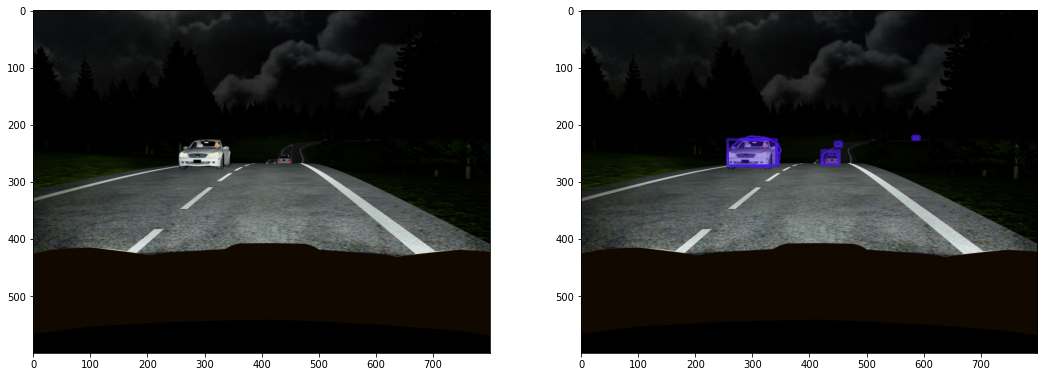

In [ ]:
#show the images
plt.figure(figsize=(18, 10))

img = Image.open('test_imgs/img_r_128.png')
plt.subplot(1, 2, 1)
plt.imshow(img)

img = Image.open('predict/2.jpg')
plt.subplot(1, 2, 2)
plt.imshow(img)

Reference: https://gitlab.com/irafm-ai/poly-yolo